In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)

In [2]:
# laoding and reading the application dataset
appds = pd.read_csv("application_data.csv")
appds.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
appds.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [5]:
appds.shape

(307511, 122)

In [4]:
appds.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### checking and handling null values

In [6]:
appds.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
appds.isnull().values.sum()

9152465

In [7]:
# checking null value percentage
appds.isnull().sum()/len(appds)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
round(appds.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [11]:
# drop columns where null value is > 50%
appds = appds.loc[:,appds.isnull().mean()<=0.5]
appds.shape

(307511, 81)

In [14]:
# checking the columns that are to be imputed 
appds.columns[(appds.isnull().mean()<=0.13) & (appds.isnull().mean()>0)].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [19]:
# checking dtype & imputing values in EXT_SOURCE_2
appds['EXT_SOURCE_2'].dtype

dtype('float64')

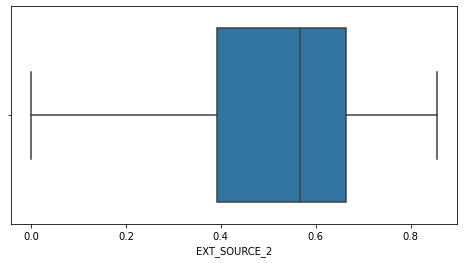

In [22]:
# we see the data type for this is float64 which makes it a numerical value , so we use mean/median as a way to impute values
# checking for outliers in EXT_SOURCE_2
plt.figure(figsize=[8,4])
sns.boxplot(appds['EXT_SOURCE_2'])
plt.show()

In [23]:
# we see there are no outliers in this column , so we can use either mean or median it won't make a difference
median_val = appds['EXT_SOURCE_2'].median()
median_val

0.5659614260608526

In [26]:
# checking dtype and imputing values in AMT_ANNUITY
appds['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

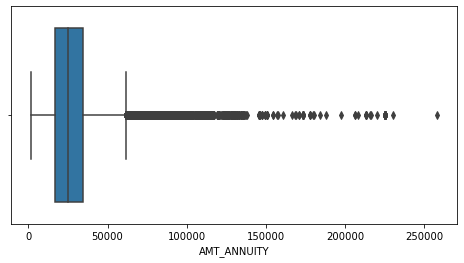

In [30]:
# the above column has dtype as int64 
# checing for outliers
plt.figure(figsize=[8,4])
sns.boxplot(appds['AMT_ANNUITY'])
plt.show()

In [31]:
# we see from boxplot that there are outliers present in the column so we use median as way for imputation
median_val = appds['AMT_ANNUITY'].median()
median_val

24903.0

In [32]:
# # checking dtype and imputing values in CNT_FAM_MEMBERS
appds['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

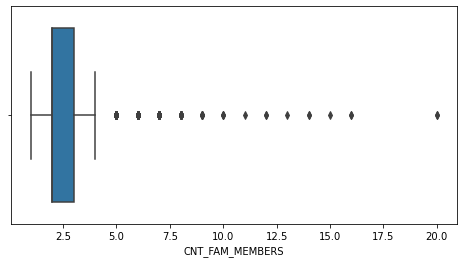

In [33]:
# the above column has dtype as int64 
# checing for outliers
plt.figure(figsize=[8,4])
sns.boxplot(appds['CNT_FAM_MEMBERS'])
plt.show()

In [34]:
# we see from boxplot that there are outliers present in the column so we use median as way for imputation
median_val = appds['CNT_FAM_MEMBERS'].median()
median_val

2.0

In [35]:
# checking dtype and imputing values in NAME_TYPE_SUITE
appds['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [37]:
# the above column has dtype as int64 
# this column has categorical values in it so we impute using mode 
mode_val = appds['NAME_TYPE_SUITE'].mode()
mode_val

0    Unaccompanied
dtype: object

In [38]:
# checking dtype and imputing values in AMT_GOODS_PRICE
appds['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

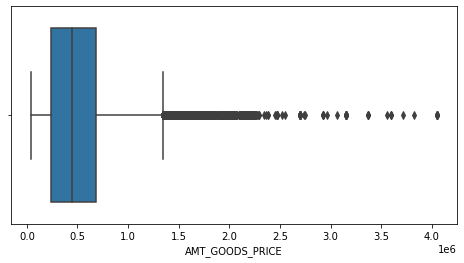

In [39]:
# the above column has dtype as int64 
# checing for outliers
plt.figure(figsize=[8,4])
sns.boxplot(appds['AMT_GOODS_PRICE'])
plt.show()

In [40]:
# we see from boxplot that there are outliers present in the column so we use median as way for imputation
median_val = appds['AMT_GOODS_PRICE'].median()
median_val

450000.0

##### checking data types for the columns 

In [43]:
# float data type
list(appds.select_dtypes(include = 'float64'))

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [44]:
col_convert = ['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
                   'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']
appds.loc[:,col_convert]=appds.loc[:,col_convert].apply(lambda col: col.astype('int',errors='ignore'))

In [52]:
# checking column where dtype is object
col_con_obj = list(appds.select_dtypes(include='object'))
col_con_obj

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [54]:
appds.loc[:,col_con_obj]=appds.loc[:,col_con_obj].apply(lambda col: col.astype('str',errors='ignore'))

In [55]:
appds.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# checking XNA "not available" part in the CODE_GENDER column and finding with which it should it replaced
appds.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [57]:
# since there are more number of F in the gender column we replace XNA with F values
appds.loc[appds.CODE_GENDER == "XNA","CODE_GENDER"] = "F"

In [58]:
appds.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

##### binning variables

In [60]:
appds['AMT_INCOME_TOTAL'].quantile([0,0.2,0.4,0.6,0.8,1])

0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [61]:
# creating a categorical var for total income
appds['INCOME_GROUP']=pd.qcut(appds['AMT_INCOME_TOTAL'],q=[0,0.2,0.4,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [65]:
abs(appds['DAYS_BIRTH']).quantile([0,0.2,0.4,0.6,0.8,1])

0.0     7489.0
0.2    11694.0
0.4    14416.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [66]:
# converting days in years and creating a new var for age
appds['AGE_YEARS']=abs(appds['DAYS_BIRTH'])//365

In [67]:
appds['AGE_YEARS'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_YEARS, dtype: float64

In [68]:
# creating bins at 5 years apart as there are age groups from 20 to 69
appds['AGE_GROUP']=pd.cut(appds['AGE_YEARS'],bins=np.arange(20,71,5))

###### imbalance check

In [69]:
appds['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

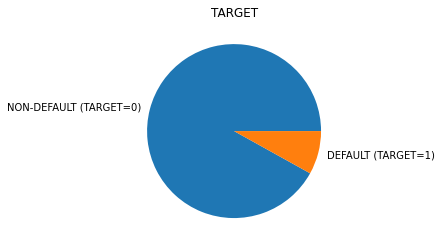

In [73]:
plt.pie(appds['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'])
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.title('TARGET')
plt.show()

In [83]:
appds.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [90]:
# dropping columns starting with FLAG
for unwanted_cols in appds.columns:
    if unwanted_cols.startswith("FLAG"):
        appds.drop(columns=unwanted_cols, inplace=True)
        
appds.shape

(307511, 56)

###### creating 2 new datasets from this dataset wrt TARGET variable 

In [91]:
appds0=appds[appds.TARGET==0] 
appds1=appds[appds.TARGET==1]

In [92]:
appds0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AGE_YEARS,AGE_GROUP
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,45,"(40, 45]"
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,52,"(50, 55]"
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,52,"(50, 55]"
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,54,"(50, 55]"
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",...,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,VeryLow,46,"(45, 50]"


In [93]:
appds1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,AGE_YEARS,AGE_GROUP
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,High,25,"(20, 25]"
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,...,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,Low,51,"(50, 55]"
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,...,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,High,47,"(45, 50]"
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,...,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,Low,36,"(35, 40]"
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,67,"(65, 70]"


In [100]:
# creating 3 list for categorical nominal , categorical oridnal and numerical variables which will be used later for better understanding while creating plots
objectvlist=[]
numericalvlist=[]
categoricalvlist=[]
for i in appds.columns:
    if appds[i].dtypes=="object":
        objectvlist.append(i)
    else:
        numericalvlist.append(i)

for i in numericalvlist:
    if len(appds[i].unique())<4:
        appds[i].astype("category")
        categoricalvlist.append(i)

for i in categoricalvlist:
    numericalvlist.remove(i)

print("Numercial Columns :", numericalvlist) 
print("\n")

print("object Columns :", objectvlist) 
print("\n")

print("categorical Columns :", categoricalvlist) 

Numercial Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_GROUP', 'AGE_YEARS', 'AGE_GROUP']


object Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'

In [101]:
# removing the binned categories from the list AGE_GROUP and INCOME_GROUP
numericalvlist.remove('INCOME_GROUP')
numericalvlist.remove('AGE_GROUP')
numericalvlist.remove('SK_ID_CURR')

# code gender and target are to be moved to the ordinal list 
objectvlist.remove('CODE_GENDER')

categoricalvlist.append('CODE_GENDER')

categoricalvlist.remove('TARGET')


##### univariate analysis

NAME_CONTRACT_TYPE


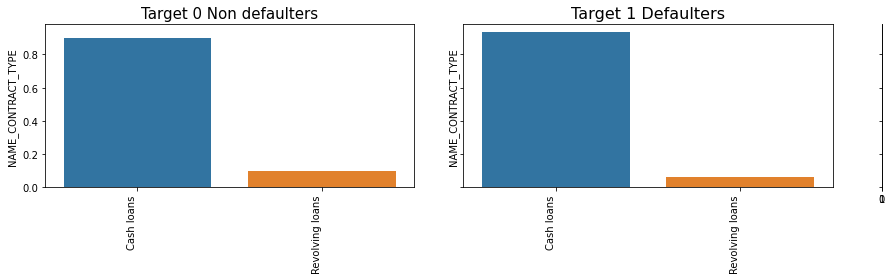

NAME_TYPE_SUITE


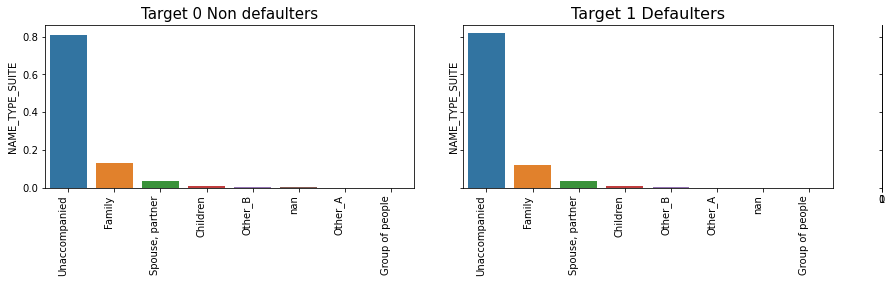

NAME_INCOME_TYPE


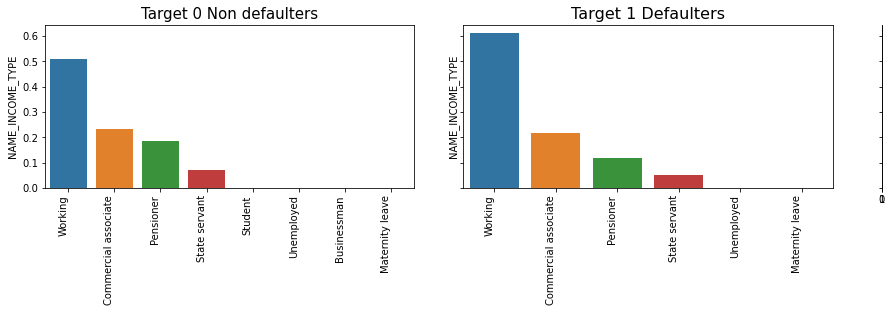

NAME_EDUCATION_TYPE


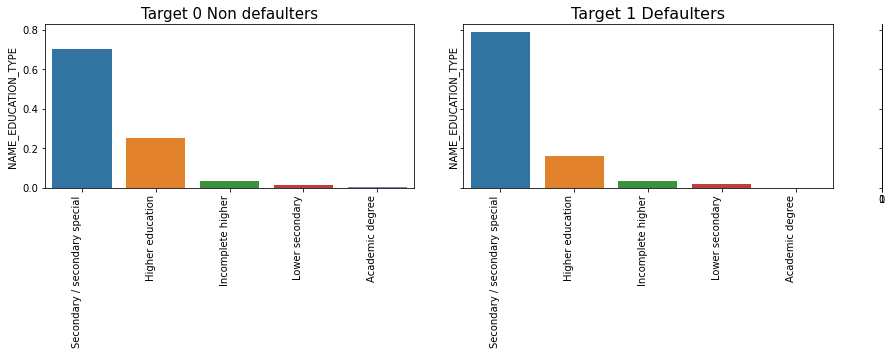

NAME_FAMILY_STATUS


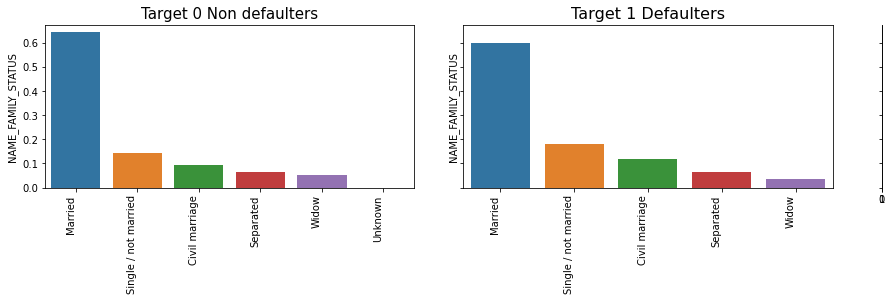

NAME_HOUSING_TYPE


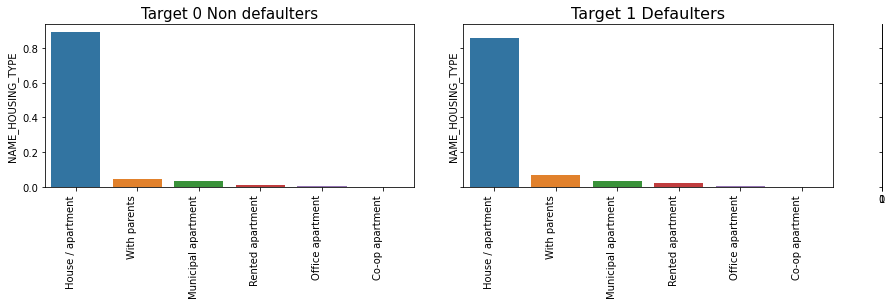

OCCUPATION_TYPE


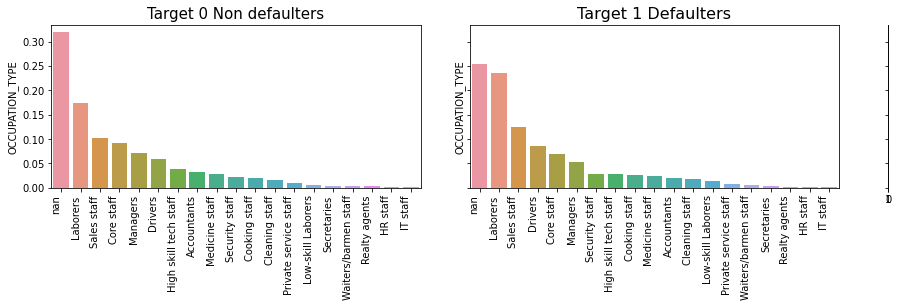

WEEKDAY_APPR_PROCESS_START


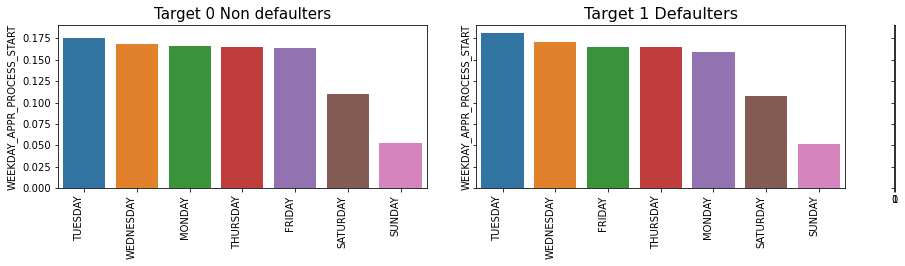

ORGANIZATION_TYPE


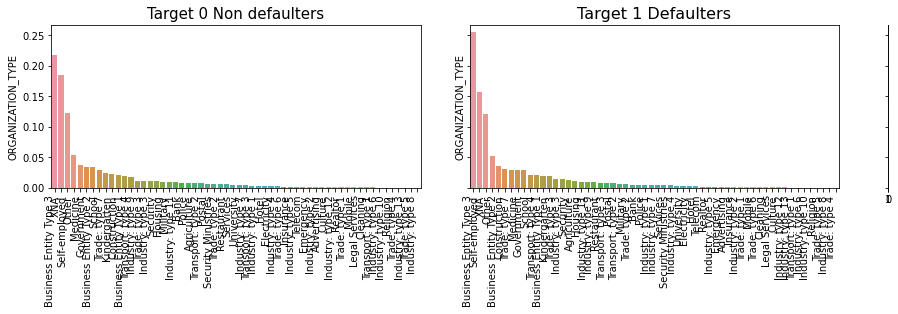

EMERGENCYSTATE_MODE


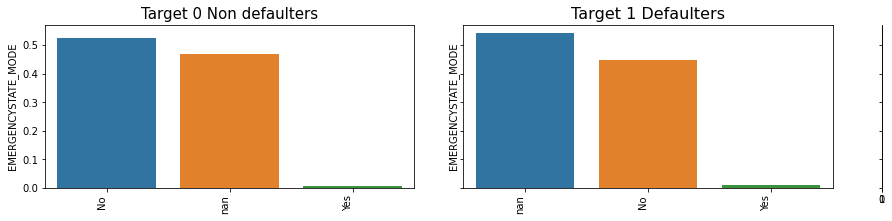

In [103]:
# loop to do side by side analysis for all categorical nominal 
for i in objectvlist:
    
    categoricalnom0=appds0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,3))
    print(i)
    plot1=sns.barplot(x=categoricalnom0.index, y=categoricalnom0, ax=ax1)
    plot1.set_xticklabels(plot1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    plot1.axes.set_title('Target 0 Non defaulters',fontsize= 15,fontweight= 9)
    categoricalnom1=appds1[i].value_counts(normalize=True)
    plot2=sns.barplot(x=categoricalnom1.index, y=categoricalnom1,ax=ax2)
    plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, horizontalalignment='right')
    plot2.axes.set_title('Target 1 Defaulters',fontsize= 16,fontweight= 9)
    plt.show()

REGION_RATING_CLIENT


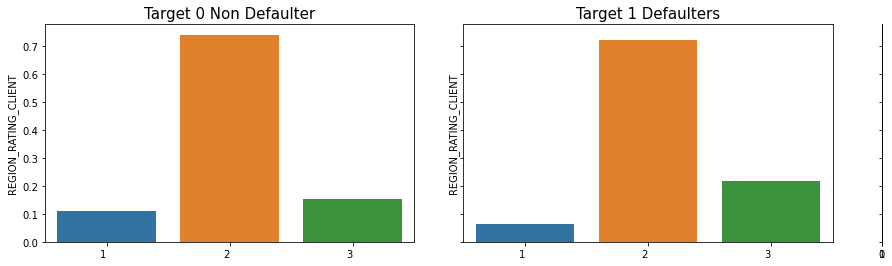

REGION_RATING_CLIENT_W_CITY


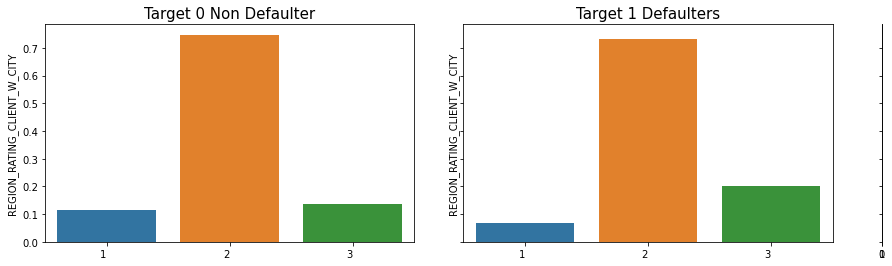

REG_REGION_NOT_LIVE_REGION


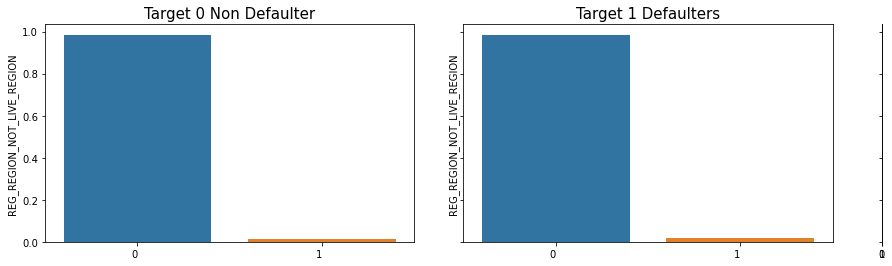

REG_REGION_NOT_WORK_REGION


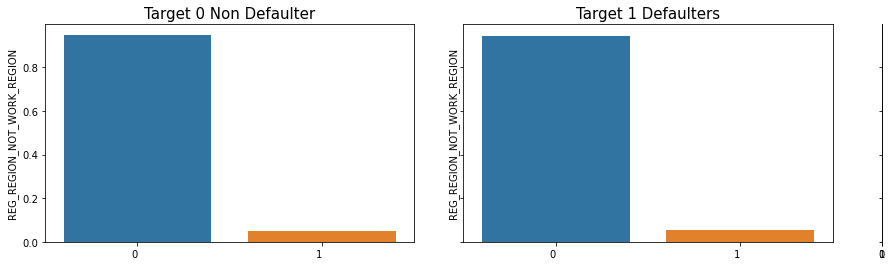

LIVE_REGION_NOT_WORK_REGION


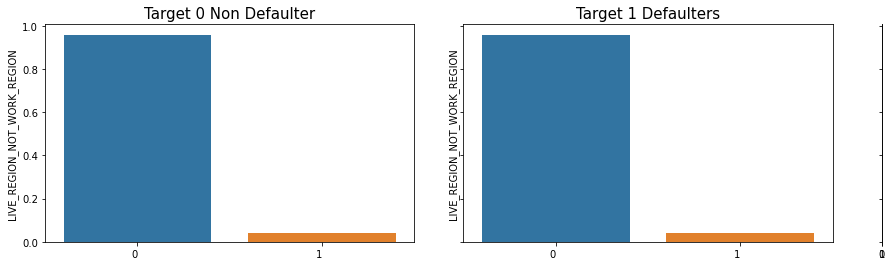

REG_CITY_NOT_LIVE_CITY


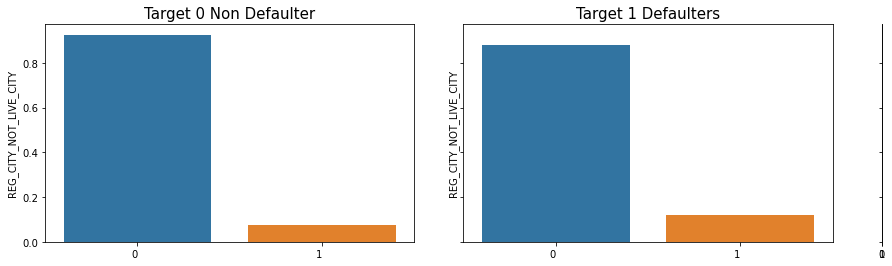

REG_CITY_NOT_WORK_CITY


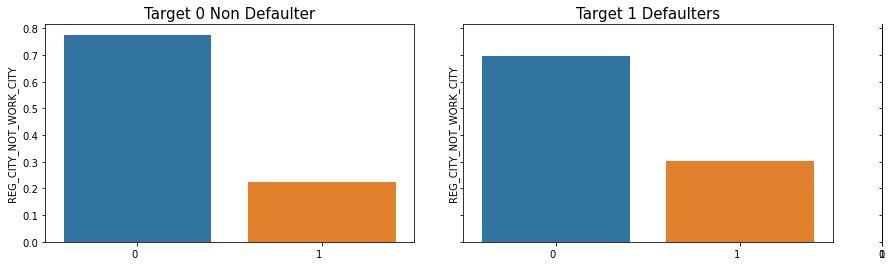

LIVE_CITY_NOT_WORK_CITY


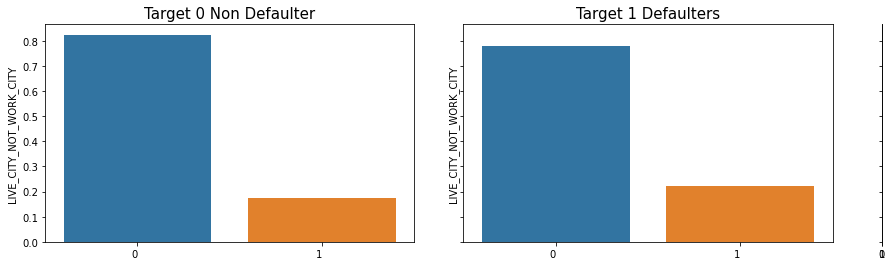

CODE_GENDER


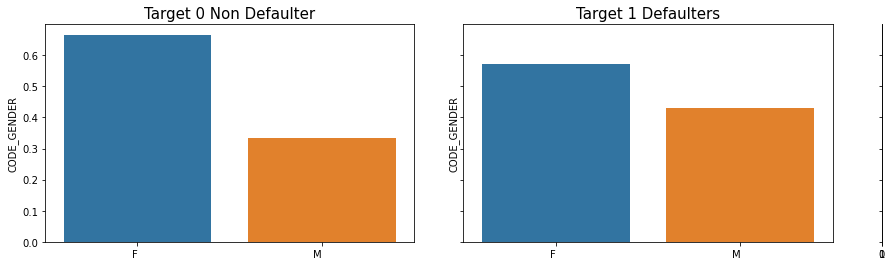

In [106]:
# side by side analysis for categorical ordinal using plots
for i in categoricalvlist:
    categoricalord0=appds0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print(i)
    plot1=sns.barplot(x=categoricalord0.index, y=categoricalord0, ax=ax1)
    plot1.set_xticklabels(plot1.get_xticklabels(), horizontalalignment='right')
    plot1.axes.set_title('Target 0 Non Defaulter',fontsize= 15,fontweight= 7)
    categoricalord1=appds1[i].value_counts(normalize=True)
    plot2=sns.barplot(x=categoricalord1.index, y=categoricalord1,ax=ax2)
    plot2.set_xticklabels(plot2.get_xticklabels(), horizontalalignment='right')
    plot2.axes.set_title('Target 1 Defaulters',fontsize= 15,fontweight= 9)
    plt.show()

CNT_CHILDREN


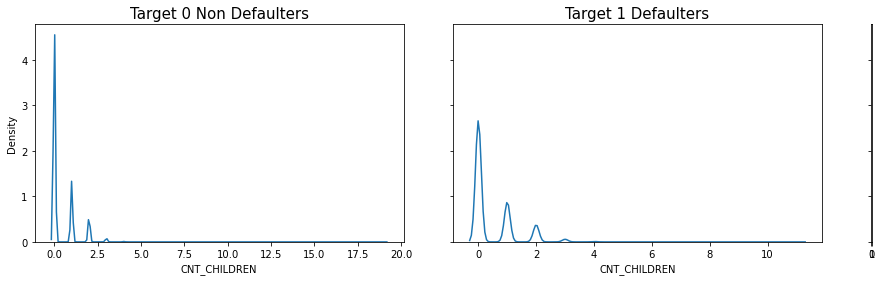

AMT_INCOME_TOTAL


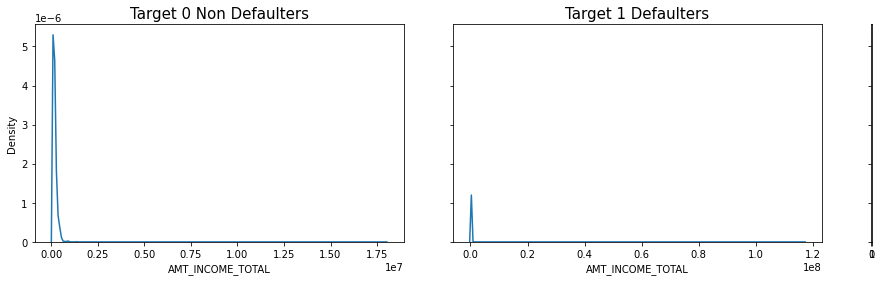

AMT_CREDIT


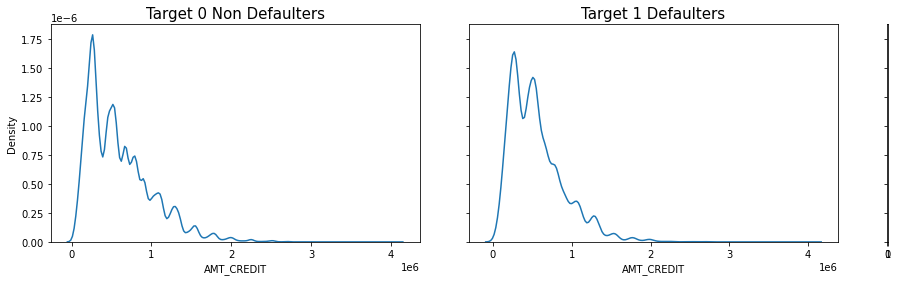

AMT_ANNUITY


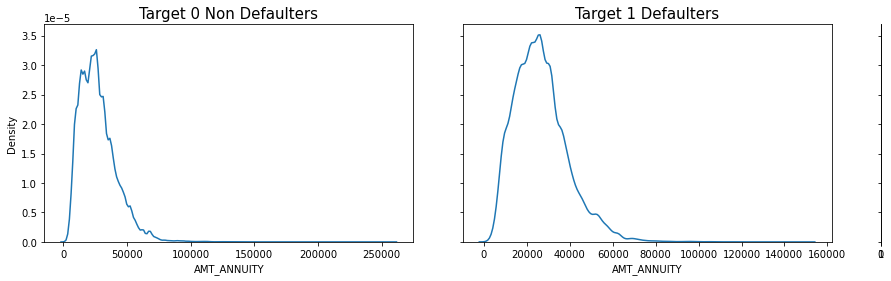

AMT_GOODS_PRICE


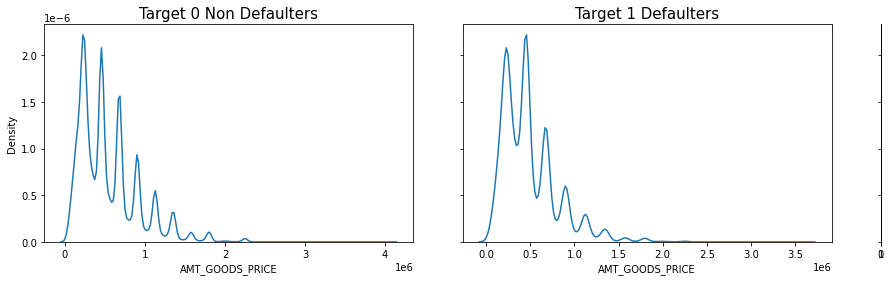

REGION_POPULATION_RELATIVE


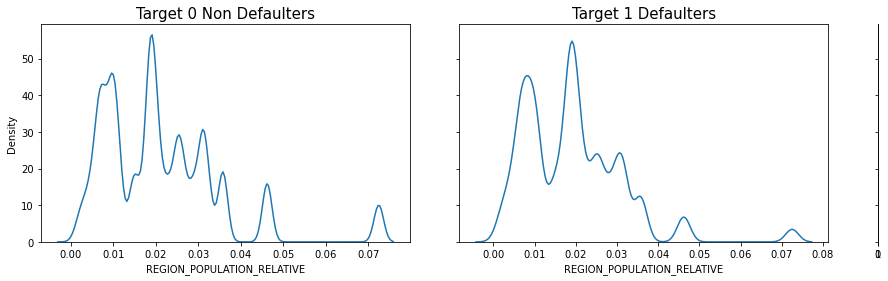

DAYS_BIRTH


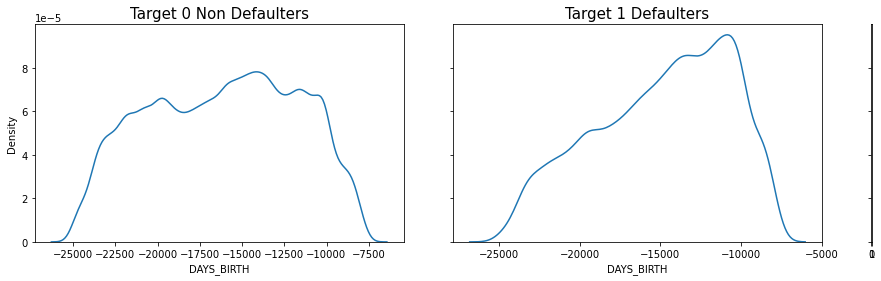

DAYS_EMPLOYED


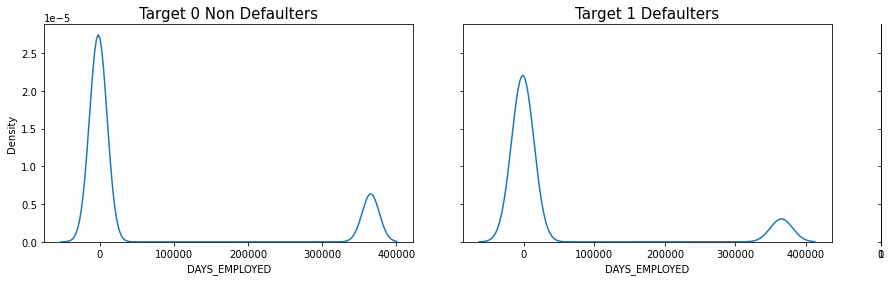

DAYS_REGISTRATION


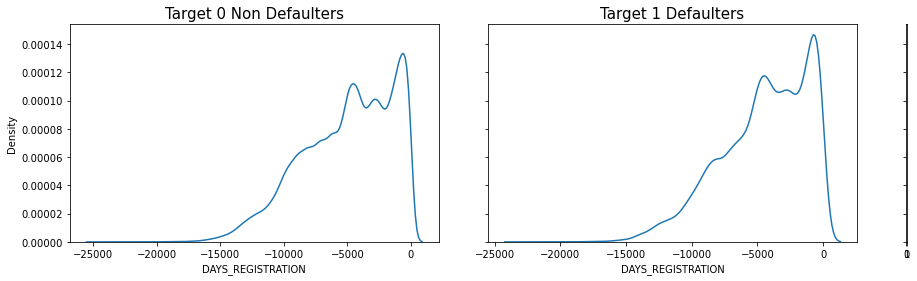

DAYS_ID_PUBLISH


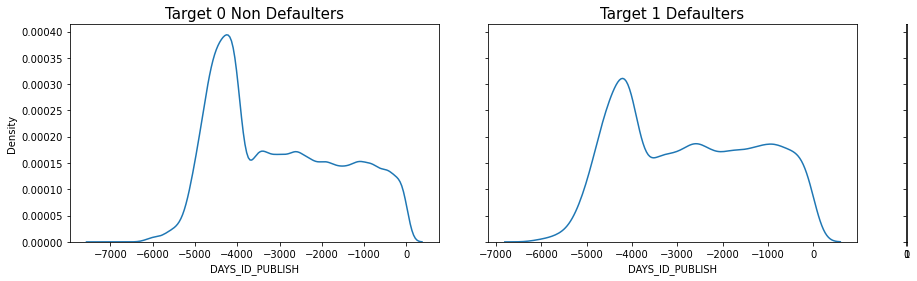

CNT_FAM_MEMBERS


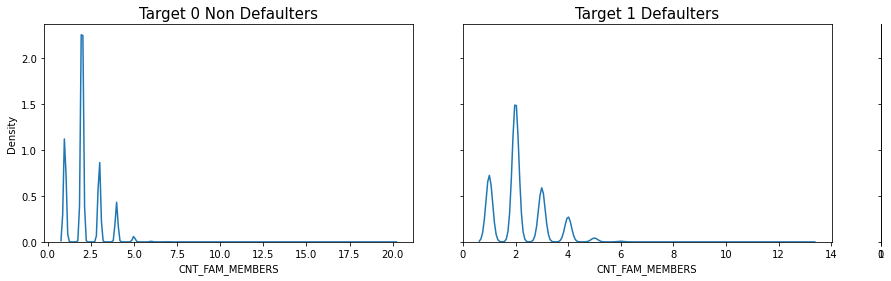

HOUR_APPR_PROCESS_START


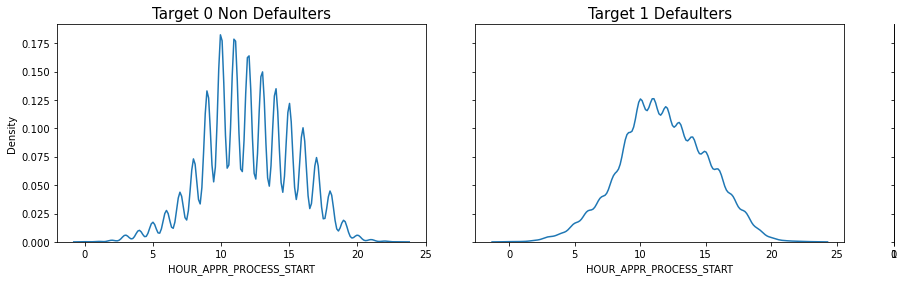

EXT_SOURCE_2


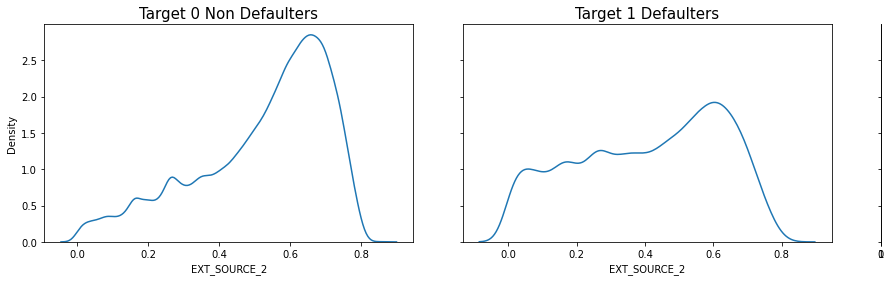

EXT_SOURCE_3


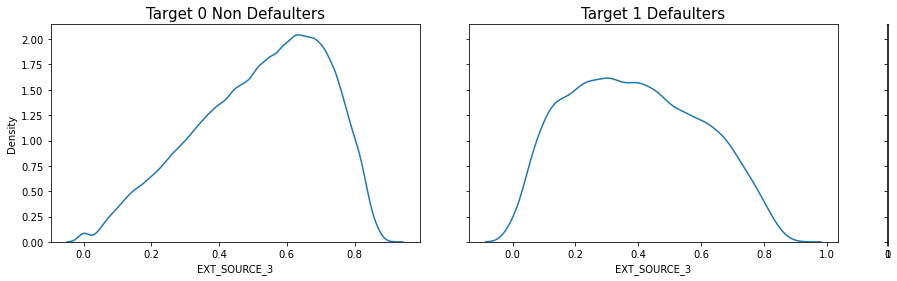

YEARS_BEGINEXPLUATATION_AVG


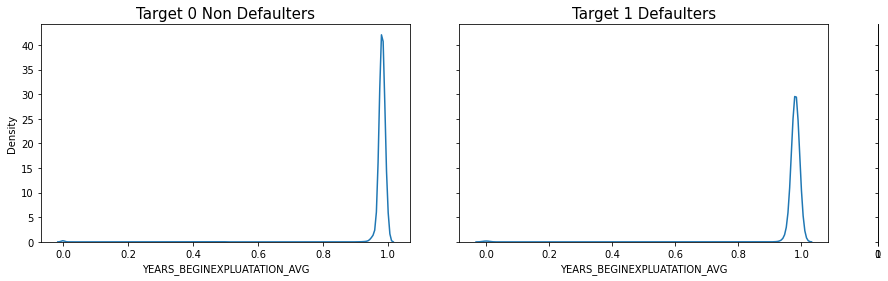

FLOORSMAX_AVG


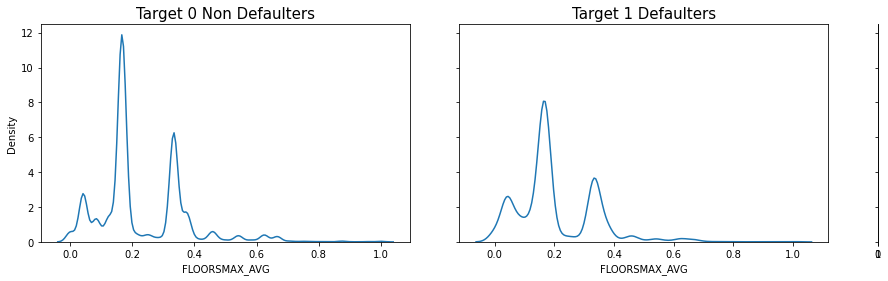

YEARS_BEGINEXPLUATATION_MODE


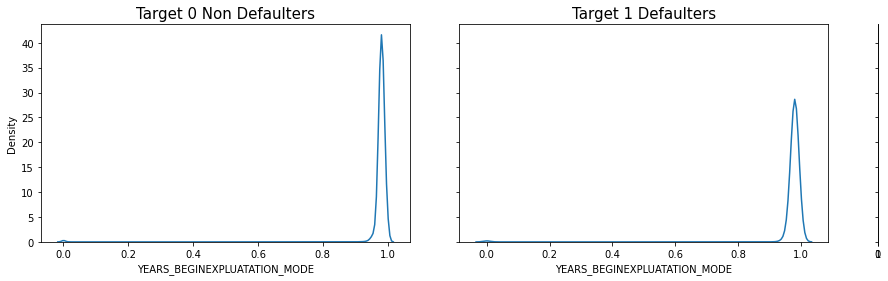

FLOORSMAX_MODE


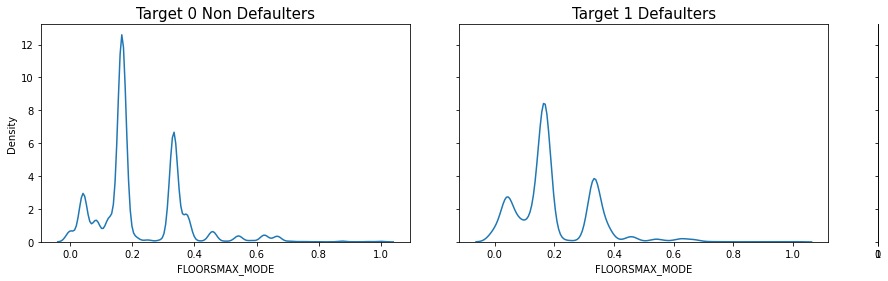

YEARS_BEGINEXPLUATATION_MEDI


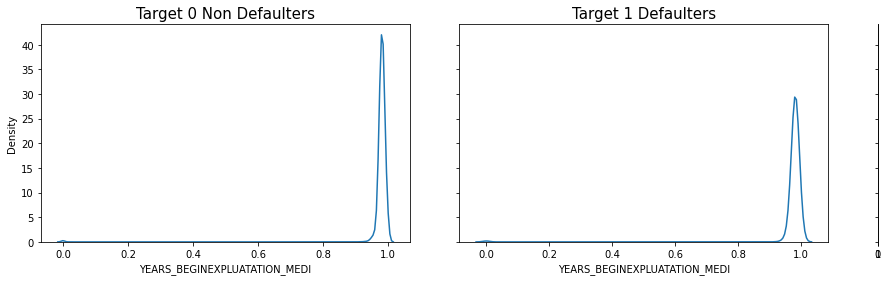

FLOORSMAX_MEDI


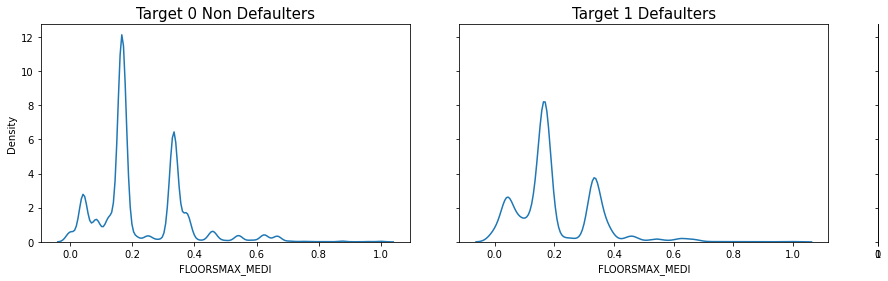

TOTALAREA_MODE


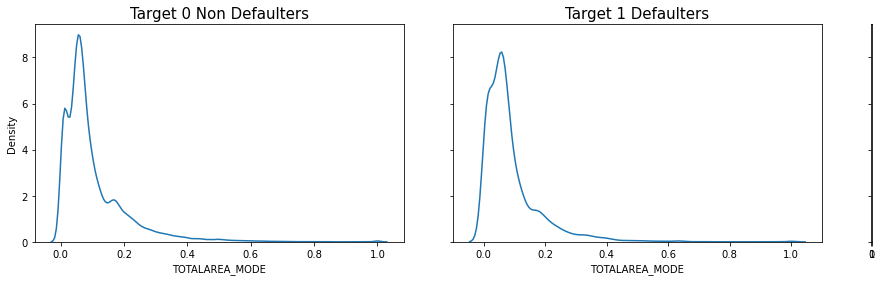

OBS_30_CNT_SOCIAL_CIRCLE


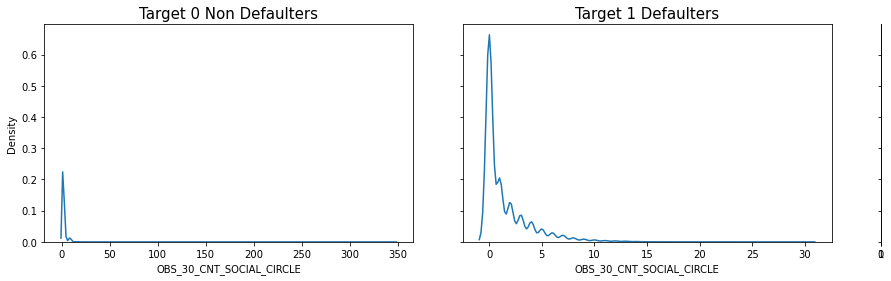

DEF_30_CNT_SOCIAL_CIRCLE


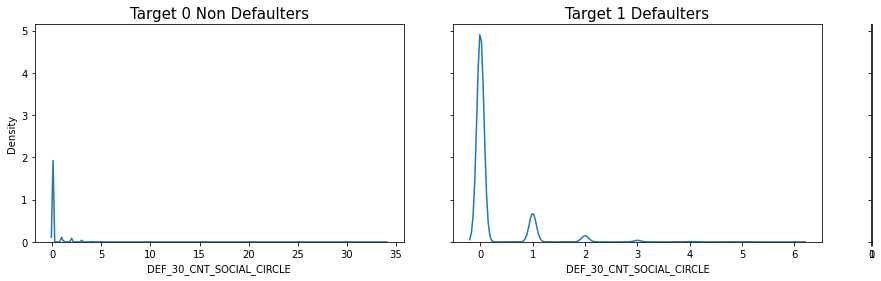

OBS_60_CNT_SOCIAL_CIRCLE


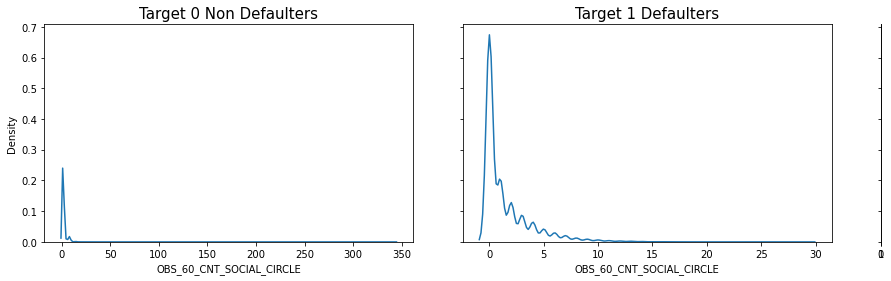

DEF_60_CNT_SOCIAL_CIRCLE


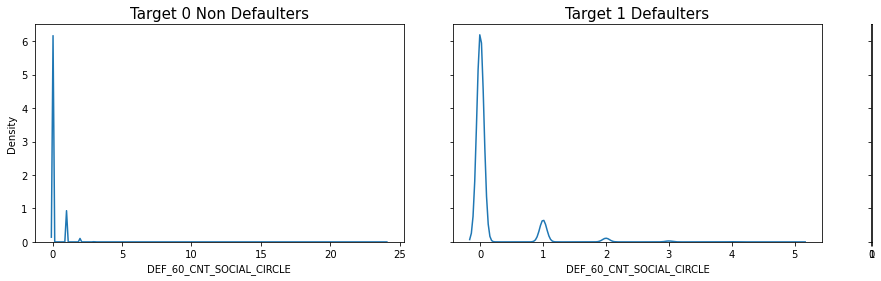

DAYS_LAST_PHONE_CHANGE


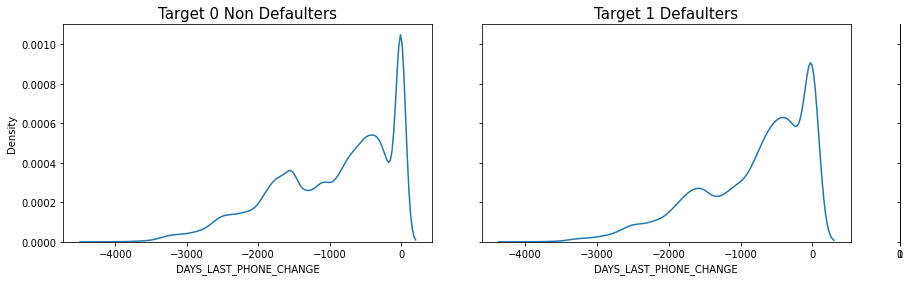

AMT_REQ_CREDIT_BUREAU_HOUR


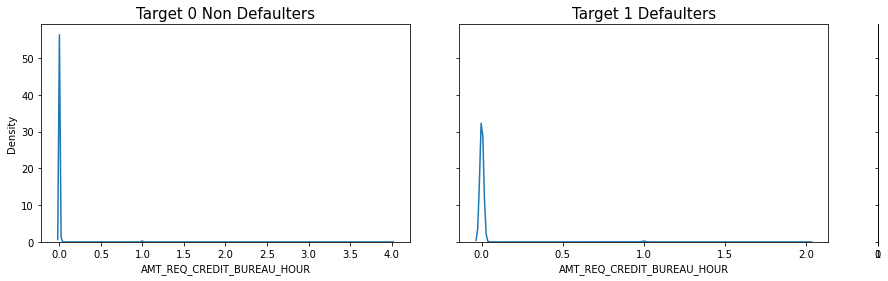

AMT_REQ_CREDIT_BUREAU_DAY


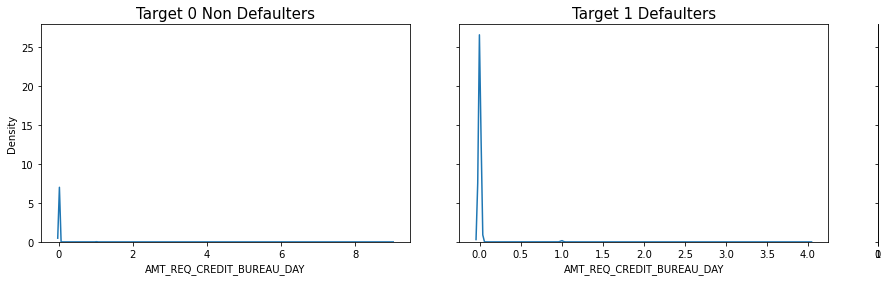

AMT_REQ_CREDIT_BUREAU_WEEK


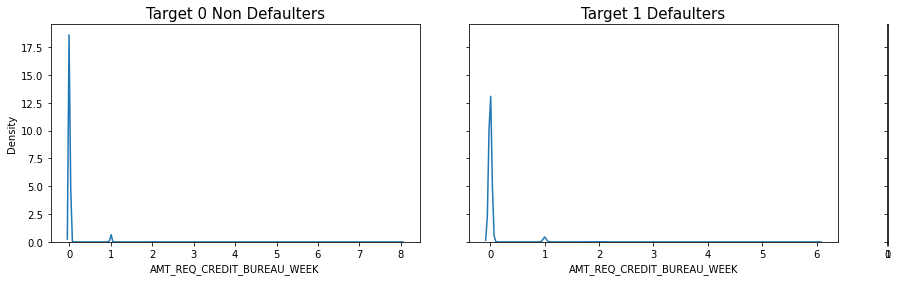

AMT_REQ_CREDIT_BUREAU_MON


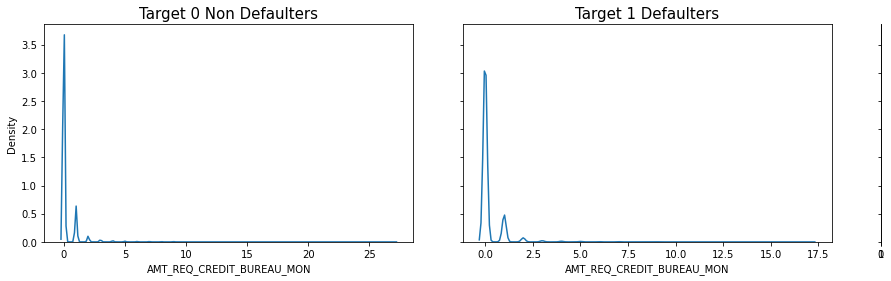

AMT_REQ_CREDIT_BUREAU_QRT


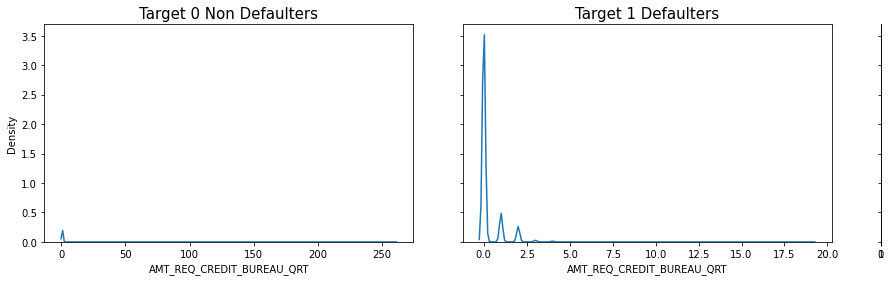

AMT_REQ_CREDIT_BUREAU_YEAR


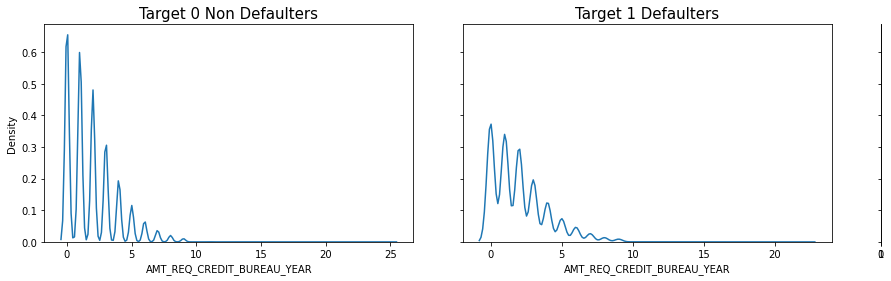

AGE_YEARS


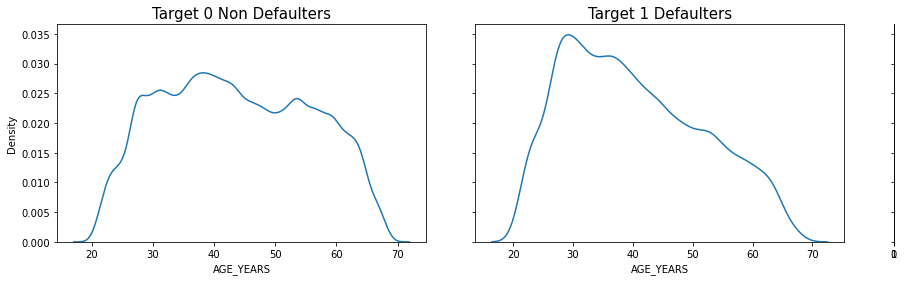

In [108]:
# for loop for analysing the numerical var
for i in numericalvlist:
    numericalan0=appds0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print(i)
    plot1=sns.distplot(appds0[i], ax=ax1,hist = False)   
    plot1.axes.set_title('Target 0 Non Defaulters',fontsize= 15,fontweight= 9)
    
    numericalan1=appds1[i].value_counts()
    plot2=sns.distplot(a=appds1[i],ax=ax2,hist = False)
    plot2.axes.set_title('Target 1 Defaulters',fontsize= 15,fontweight= 9)
    plt.show()


AGE_GROUP


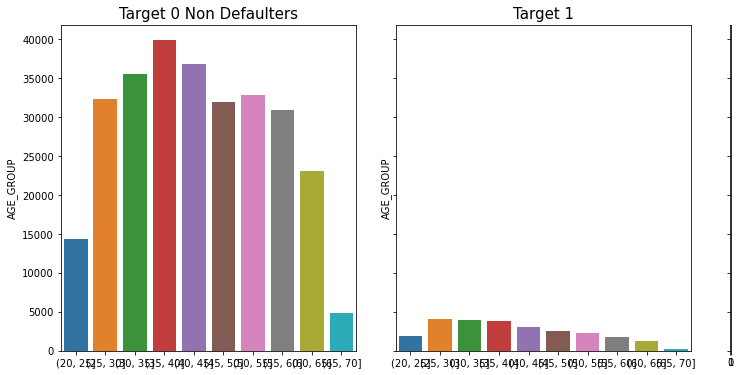

INCOME_GROUP


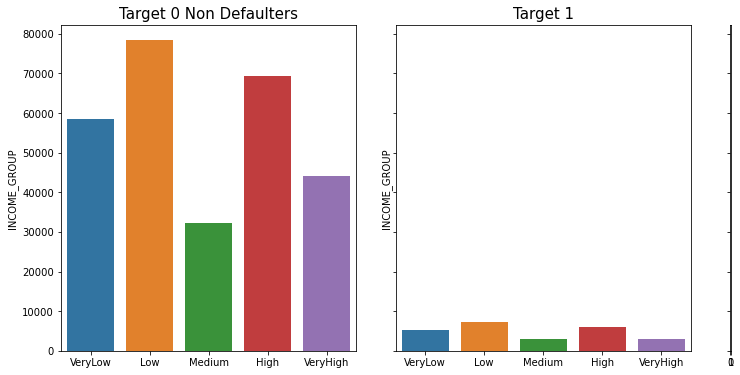

In [109]:
# analysis for binned groups 
bins=['AGE_GROUP','INCOME_GROUP']
for i in bins:
    binned0=appds0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print(i)
    plot1=sns.barplot(x=binned0.index, y=binned0, ax=ax1)
    plot1.set_xticklabels(plot1.get_xticklabels(), horizontalalignment='center')
    plot1.axes.set_title('Target 0 Non Defaulters',fontsize= 15,fontweight= 9)
    
    binned1=appds1[i].value_counts()
    plot2=sns.barplot(x=binned1.index, y=binned1,ax=ax2)
    plot2.set_xticklabels(plot2.get_xticklabels(), horizontalalignment='center')
    plot2.axes.set_title('Target 1',fontsize= 15,fontweight= 9)
    plt.show()

##### Bivariate analysis

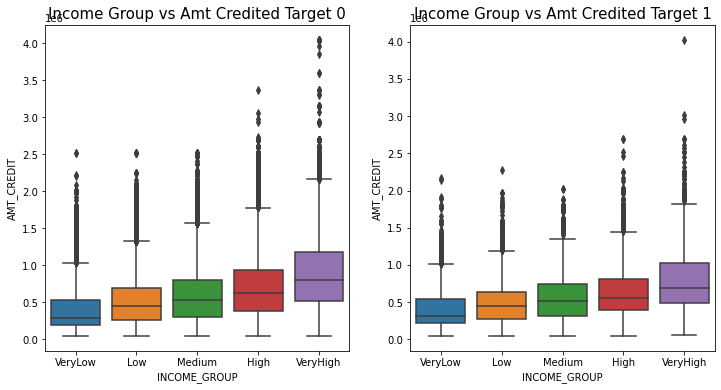

In [124]:
# categoric and numeric check
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Income Group vs Amt Credited Target 0",fontsize= 15,fontweight= 9)
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =appds0)

plt.subplot(1,2,2)
plt.title("Income Group vs Amt Credited Target 1",fontsize= 15,fontweight= 9)
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = appds1)

plt.show()

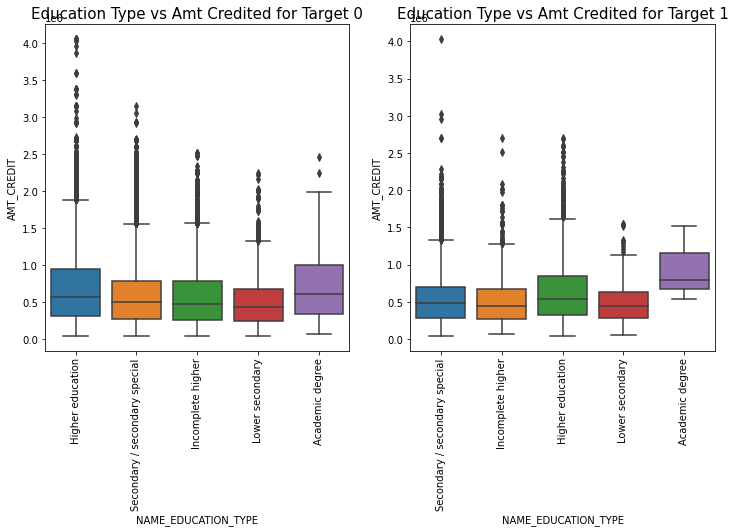

In [131]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Education Type vs Amt Credited Target 0",fontsize= 15,fontweight= 9)
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =appds0)
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type vs Amt Credited Target 1",fontsize= 15,fontweight= 9)
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = appds1)
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)
plt.show()

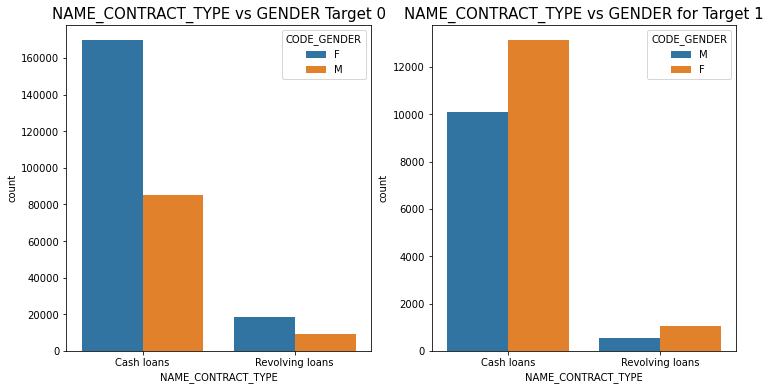

In [137]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE vs GENDER Target 0",fontsize= 15,fontweight= 9)

sns.countplot('NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =appds0)

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE vs GENDER for Target 1",fontsize= 15,fontweight= 9)
sns.countplot('NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =appds1)

plt.show()

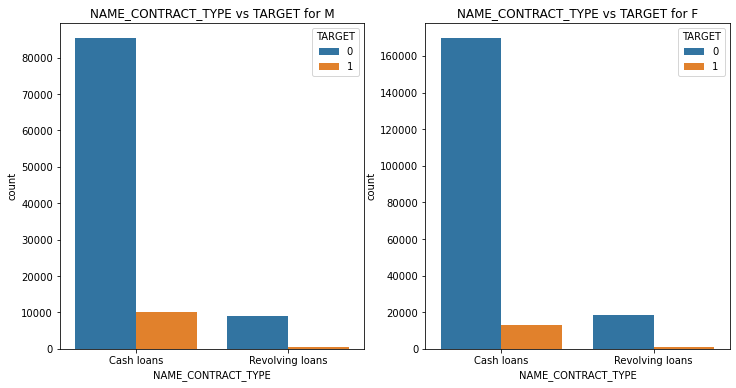

In [141]:
#checking the same where target is wrt gender
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE vs TARGET for M")

sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=appds[(appds['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE vs TARGET for F")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=appds[(appds['CODE_GENDER']=="F")])

plt.show()

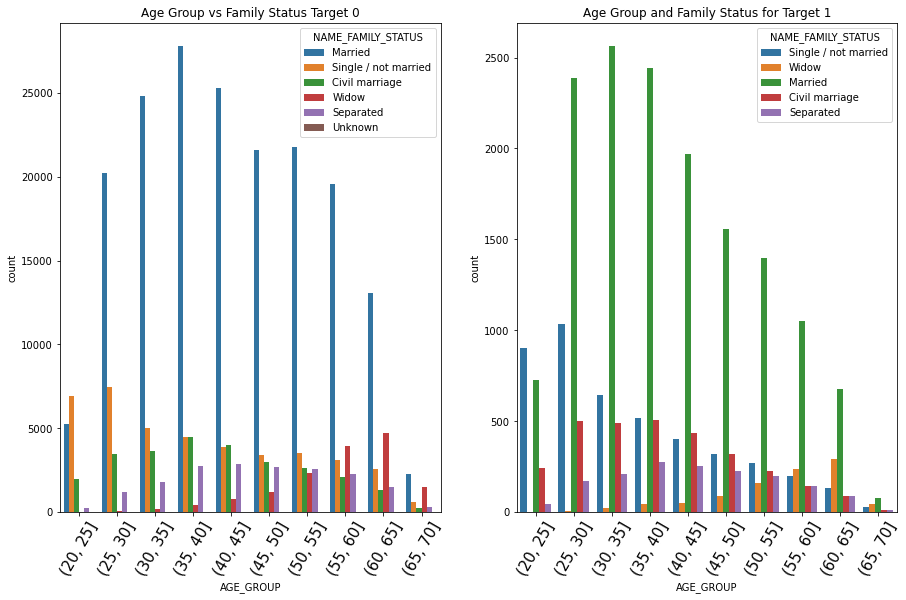

In [147]:
# analysing on the basis of age group and the family status
plt.figure(figsize = (15,9))
plt.subplot(1,2,1)
plt.title("Age Group vs Family Status Target 0")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =appds0)
plt.xticks(rotation=60, fontsize= 15,fontweight= 9)

plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =appds1)
plt.xticks(rotation=60, fontsize= 15,fontweight= 9)

plt.show()

##### Correlation

In [157]:
# when we have TARGET = 0
corr0=appds0.drop(categoricalvlist, axis=1)
corrcategorical0=corr0.corr().abs()
correlation0 = corrcategorical0.where(np.triu(np.ones(corrcategorical0.shape),k=1).astype(np.bool)).unstack().reset_index()
correlation0.columns=['Column1','Column2','Correlation']
correlation0.dropna(subset = ['Correlation'], inplace = True)
correlation0 = correlation0.sort_values(by=['Correlation'], ascending=False)
correlation0.head(15)

,Column1,Column2,Correlation
1198,AGE_YEARS,DAYS_BIRTH,0.999711
898,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
752,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018
716,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582
754,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988153
214,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
682,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985603
646,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.971032
718,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064
422,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571


In [156]:
# when we have TARGET = 1
corr1=appds1.drop(categoricalvlist, axis=1)
corrcategorical1=corr1.corr().abs()
correlation1 = corrcategorical1.where(np.triu(np.ones(corrcategorical0.shape),k=1).astype(np.bool)).unstack().reset_index()
correlation1.columns=['Column1','Column2','Correlation']
correlation1.dropna(subset = ['Correlation'], inplace = True)
correlation1 = correlation1.sort_values(by=['Correlation'], ascending=False)
correlation1.head(15)

,Column1,Column2,Correlation
1198,AGE_YEARS,DAYS_BIRTH,0.999691
898,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
752,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187
716,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124
754,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989195
682,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986594
214,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
646,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.980466
718,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073
422,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484


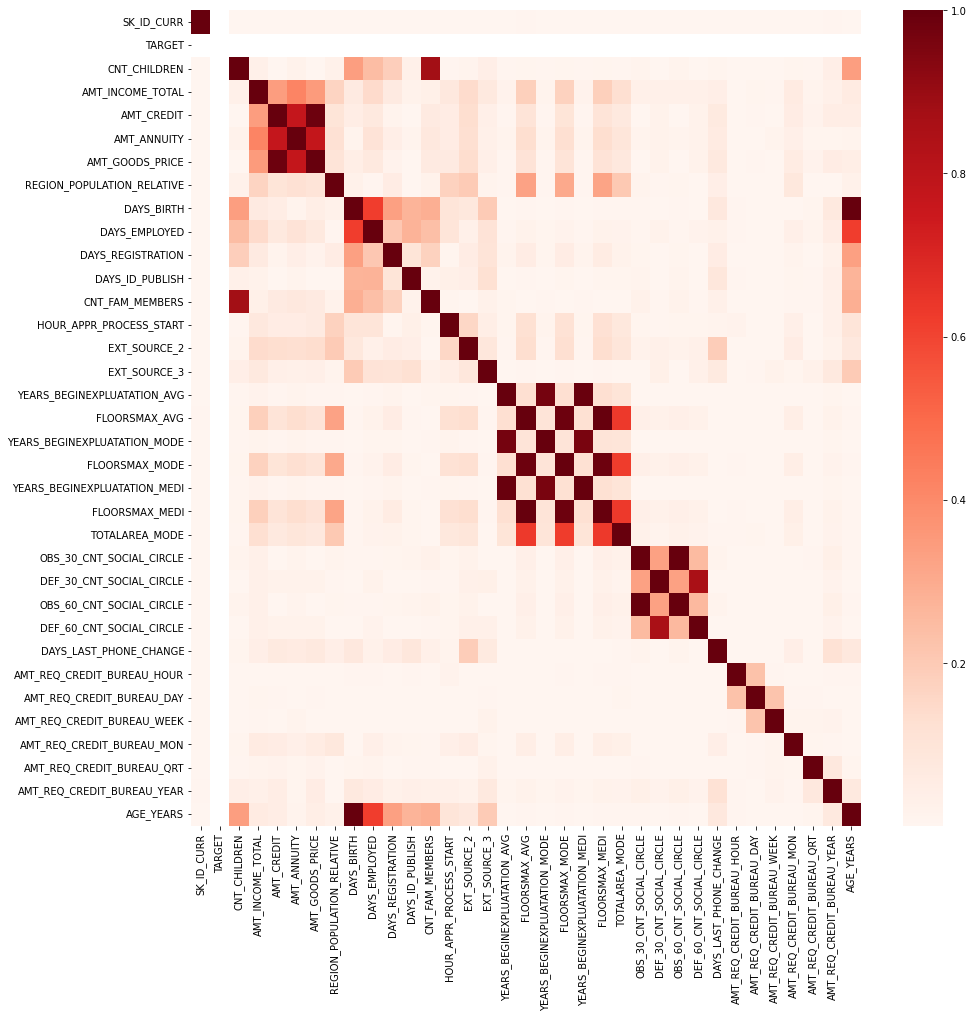

In [159]:
# analysis for correlation with heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corrcategorical0, cmap='Reds')
plt.show()

#### Previous Application

In [222]:
# reading previous application dataset
pr_appds = pd.read_csv('previous_application.csv')
pr_appds.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
pr_appds.shape

(1670214, 37)

In [224]:
# checking and handling missing values
pr_appds.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [225]:
pr_appds.isnull().sum()/len(pr_appds)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [227]:
#deleting Null values rows for AMT_ANNUITY, AMT_GOODS_PRICE 

pr_appds = pr_appds.dropna(axis=0, subset=['AMT_ANNUITY'])
pr_appds = pr_appds.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
pr_appds.isnull().sum()/len(pr_appds)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [228]:
# removing cols where null value is more than 20% and printing the same
print(pr_appds.columns[(pr_appds.isnull().sum() * 100 / pr_appds.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [230]:
dropped_col=pr_appds.columns[(pr_appds.isnull().sum() * 100 / pr_appds.shape[0]) > 20]
pr_appds.drop(axis=1, columns=dropped_col, inplace=True)
pr_appds.shape

(1246320, 26)

In [231]:
# removing irrelevant numerical cols
dropped_col=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
pr_appds.drop(axis=1, columns=dropped_col, inplace=True)
pr_appds.shape

(1246320, 22)

In [236]:
# values where data type is object are analysed
for i in pr_appds.columns:
    if pr_appds[i].dtypes=="object":
        print('\n')
        print(pr_appds[i].value_counts(normalize=True, dropna= False))
#         print('\n')



Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64


SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                             0.000991
Purchase of electronic equipment    0.000846
B

In [237]:
# on analysing the object type numerical values we delete the following list of cols
dropped_col=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
pr_appds.drop(axis=1, columns=dropped_col, inplace=True)
pr_appds.shape

(1246320, 16)

##### Univariate analysis

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64


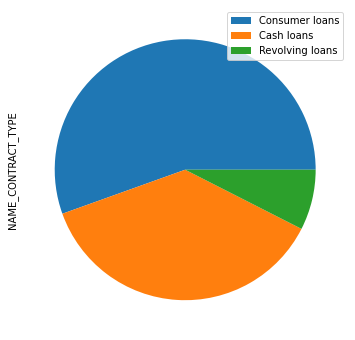



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


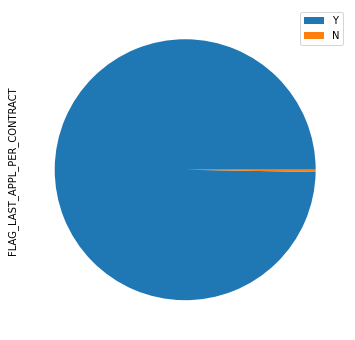



Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: NAME_CONTRACT_STATUS, dtype: float64


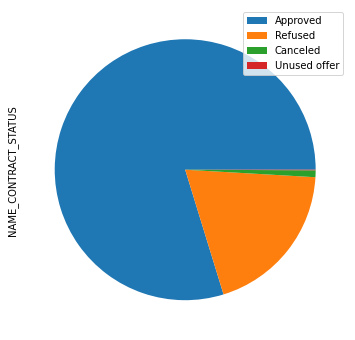



Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: NAME_CLIENT_TYPE, dtype: float64


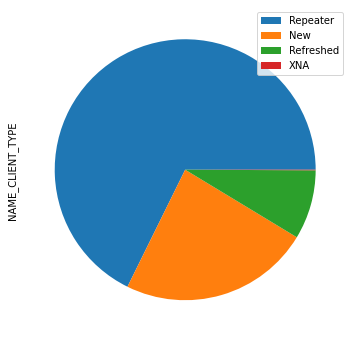



POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: NAME_PORTFOLIO, dtype: float64


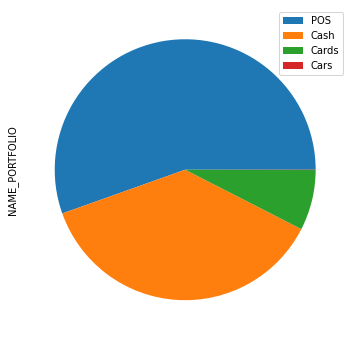



Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: CHANNEL_TYPE, dtype: float64


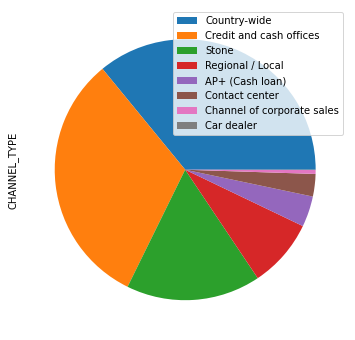



XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: NAME_SELLER_INDUSTRY, dtype: float64


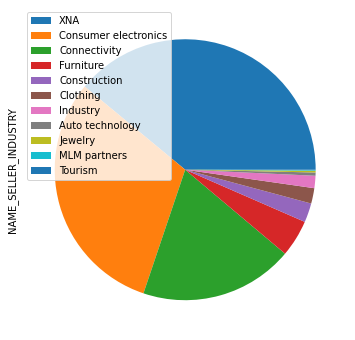



middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: NAME_YIELD_GROUP, dtype: float64


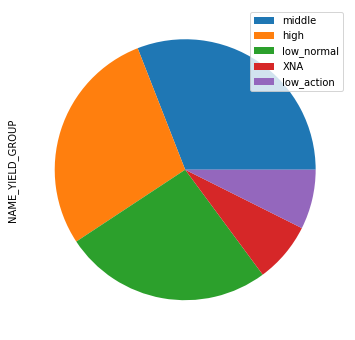



POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: PRODUCT_COMBINATION, dtype: float64


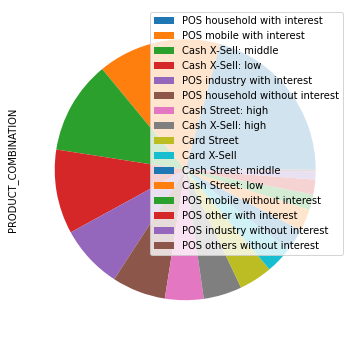

In [238]:
# where data type is as object 

for i in pr_appds.columns:
    if pr_appds[i].dtypes=="object":
        print(pr_appds[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        pr_appds[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")

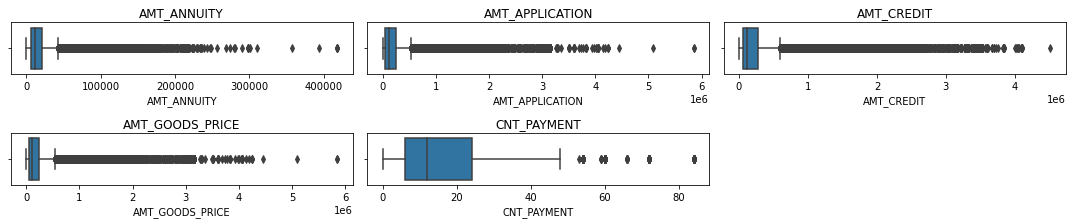

In [239]:
# where data type is given as Float
fig = plt.figure(figsize=(15,12))

x=8
y=3
z=1
for i in pr_appds.columns:
    if pr_appds[i].dtypes=="float64" or pr_appds[i].dtypes=="float32" :
        plt.subplot(x,y,z)
        plt.title('{}'.format(i, x,y,z))
        plt.xlabel(i)
        sns.boxplot(pr_appds[i])
        z = z + 1

fig.tight_layout()
plt.show()


##### bivariate analysis

In [240]:
pr_appds.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Y,Approved,Repeater,POS,Country-wide,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Y,Approved,Repeater,Cash,Contact center,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Y,Approved,Repeater,Cash,Credit and cash offices,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Y,Approved,Repeater,Cash,Credit and cash offices,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Y,Refused,Repeater,Cash,Credit and cash offices,XNA,24.0,high,Cash Street: high


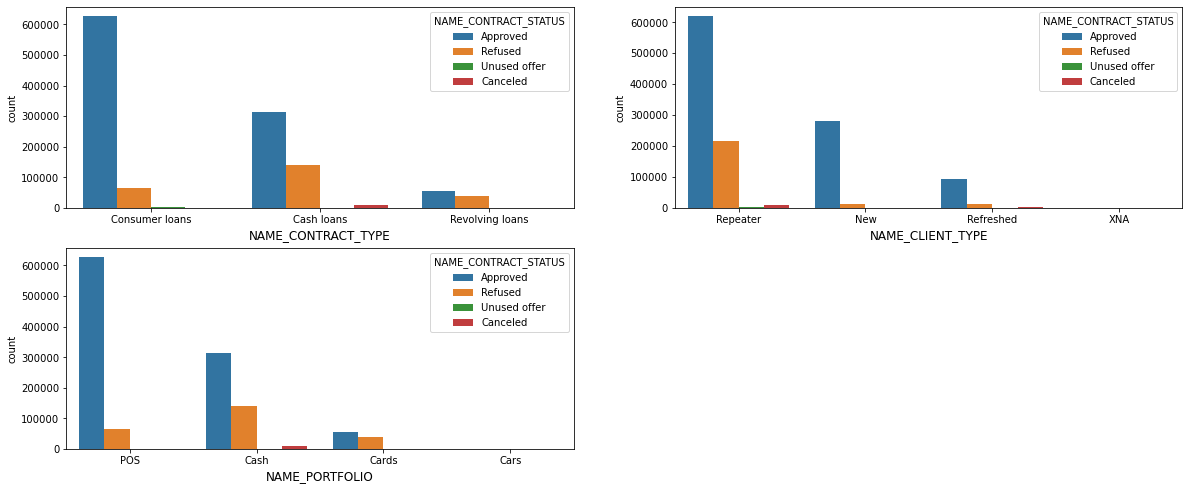

In [241]:
bivar_cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 4  
b = 2 
c = 1  

fig = plt.figure(figsize=(20,17))

for i in bivar_cols:

    plt.subplot(a, b, c)
#     plt.title(i)
    plt.xlabel(i,fontsize=12,fontweight=7)
    sns.countplot(x=i, data=pr_appds, hue='NAME_CONTRACT_STATUS')
    c = c + 1

plt.show()


##### correlation

In [245]:
corr_pr_appds=pr_appds.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

prev_corr=corr_pr_appds.corr().abs()
correl_pr = prev_corr.where(np.triu(np.ones(prev_corr.shape),k=1).astype(np.bool)).unstack().reset_index()
correl_pr.columns=['Column1','Column2','Correlation']
correl_pr.dropna(subset=['Correlation'],inplace=True)
correl_pr = correl_pr.sort_values(by=['Correlation'], ascending=False)

corr_prev

,Column1,Column2,Correlation
16,AMT_GOODS_PRICE,AMT_APPLICATION,0.999883
17,AMT_GOODS_PRICE,AMT_CREDIT,0.993028
11,AMT_CREDIT,AMT_APPLICATION,0.992965
15,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895
5,AMT_APPLICATION,AMT_ANNUITY,0.820831
10,AMT_CREDIT,AMT_ANNUITY,0.814884
22,CNT_PAYMENT,AMT_CREDIT,0.700323
21,CNT_PAYMENT,AMT_APPLICATION,0.672276
23,CNT_PAYMENT,AMT_GOODS_PRICE,0.672129
20,CNT_PAYMENT,AMT_ANNUITY,0.401020


<Figure size 1440x576 with 0 Axes>

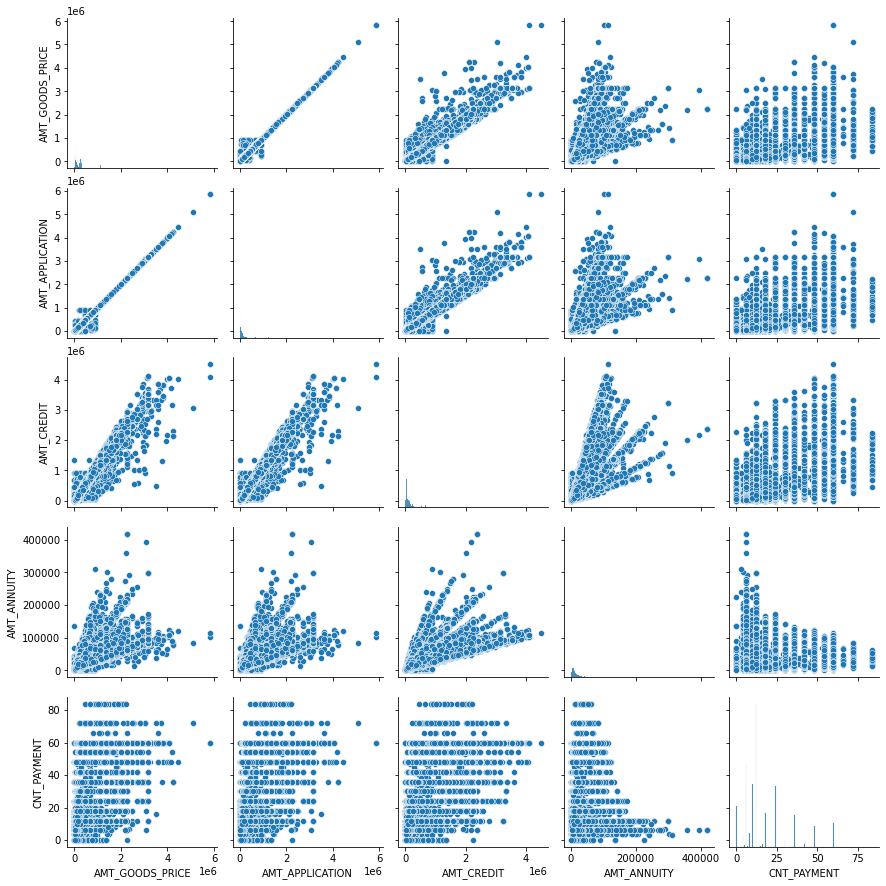

In [246]:
# plotting pairplot for the correlation observed
plt.figure(figsize=[20,8])
sns.pairplot(pr_appds[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()    

##### multivariate analysis

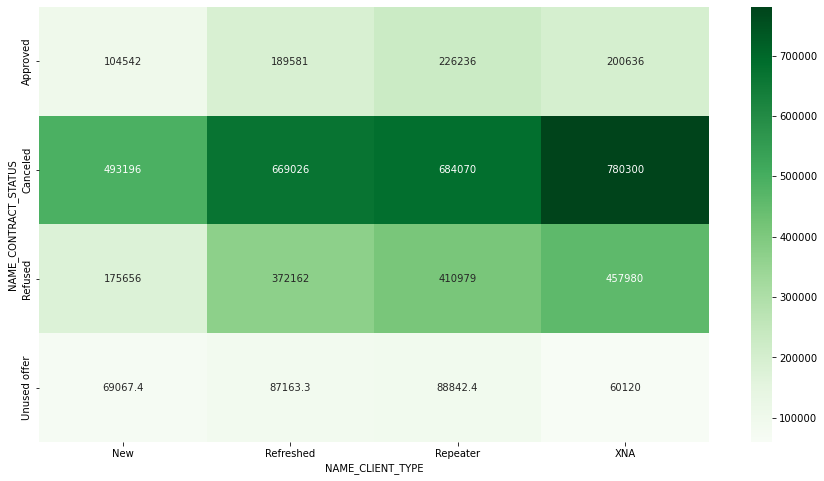

In [249]:
# analysing contract status and name client type for application amount

ana_contr_name=pd.pivot_table(data=pr_appds, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(ana_contr_name, annot=True,fmt='g',cmap='Greens')
plt.show()

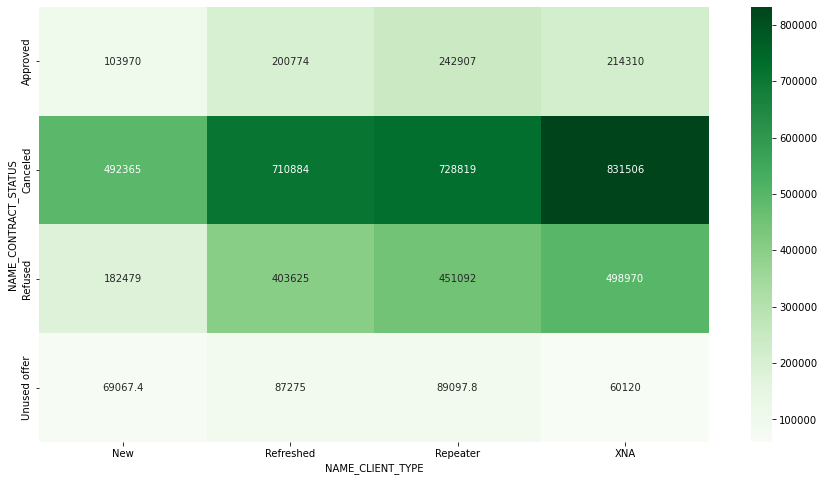

In [250]:
# analysing contract status and name client type for AMT CREDIT

ana_contr_name=pd.pivot_table(data=pr_appds, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(ana_contr_name, annot=True,fmt='g',cmap='Greens')
plt.show()

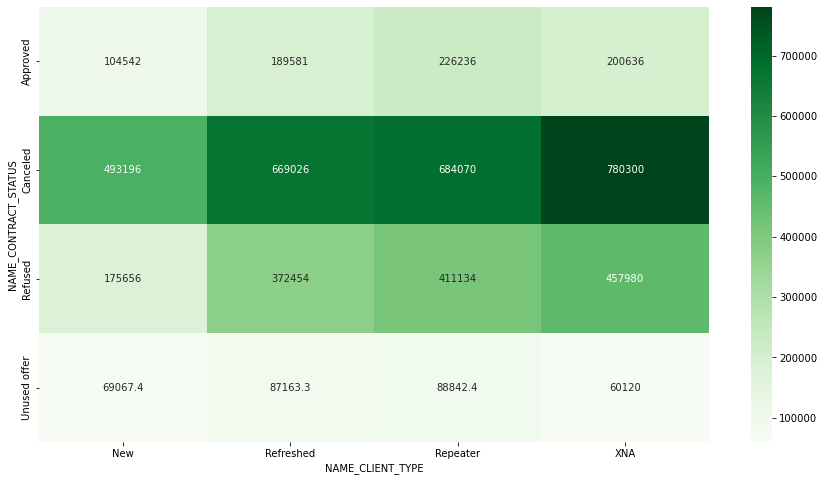

In [251]:
# analysing contract status and name client type for AMOUNT GOOD PRICE

ana_contr_name=pd.pivot_table(data=pr_appds, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(ana_contr_name, annot=True,fmt='g',cmap='Greens')
plt.show()

### Merging datasets

In [252]:
# check for duplicate values for SK_ID_CURR
dup_val= pr_appds[pr_appds.duplicated(subset='SK_ID_CURR')]
dup_val.shape

(908809, 16)

In [253]:
# merging the 2 data sets by LEFT merge
finalds=pd.merge(appds,pr_appds, how='left', on="SK_ID_CURR")
finalds.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,179055.0,Y,Approved,New,POS,Stone,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,900000.0,Y,Approved,Repeater,Cash,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,337500.0,Y,Approved,Refreshed,POS,Stone,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,68809.5,Y,Approved,Refreshed,POS,Country-wide,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,24282.0,Y,Approved,New,POS,Regional / Local,Connectivity,4.0,middle,POS mobile without interest


In [254]:
finalds.shape

(1078854, 71)

In [256]:
# analysis
contract_status_unique=finalds['NAME_CONTRACT_STATUS'].unique()
contract_status_unique

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

For :  Approved
0    0.924108
1    0.075892
Name: TARGET, dtype: float64


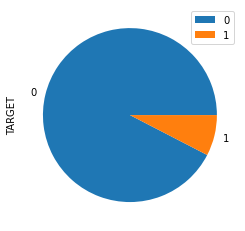

For :  Refused
0    0.884182
1    0.115818
Name: TARGET, dtype: float64


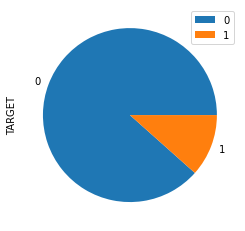

No handles with labels found to put in legend.


For :  nan
Series([], Name: TARGET, dtype: float64)


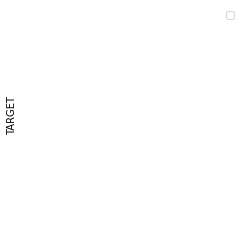

For :  Canceled
0    0.917609
1    0.082391
Name: TARGET, dtype: float64


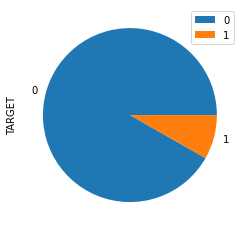

For :  Unused offer
0    0.895141
1    0.104859
Name: TARGET, dtype: float64


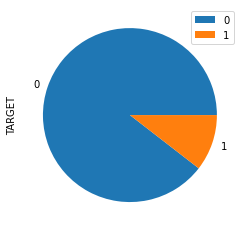

In [257]:
for i in contract_status_unique:
    print("For : ",i)
    plt.figure(figsize=[6,4])
    print(finalds[(finalds['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    finalds[(finalds['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()
    

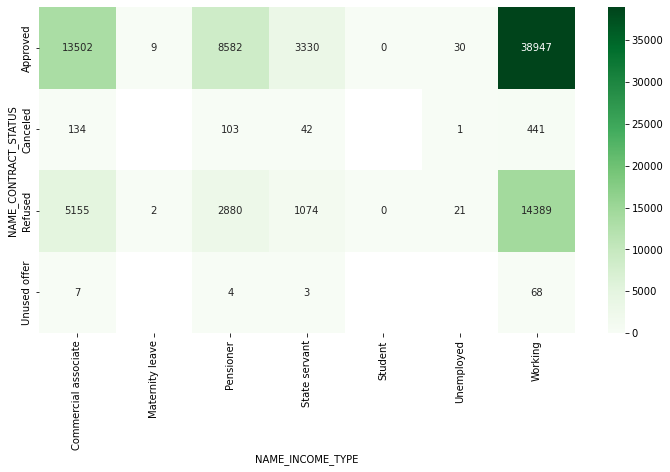

In [258]:
#analysis of NAME_CONTRACT_STATUS and NAME_INCOME_TYPE for Target

ana_contr_inc=pd.pivot_table(data=finalds,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(ana_contr_inc, annot=True,fmt='g',cmap='Greens')
plt.show()

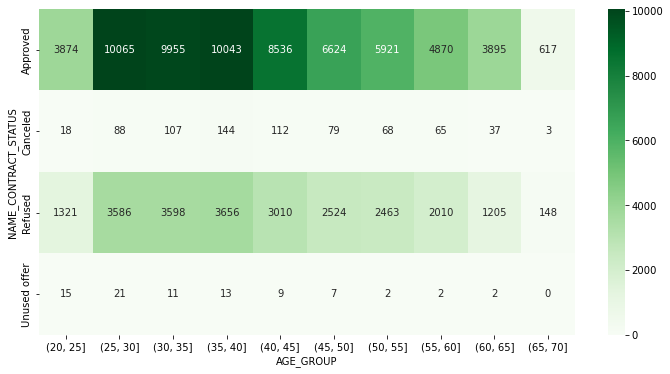

In [259]:
#analysis of NAME_CONTRACT_STATUS and AGE_GROUP for Target

ana_contr_age=pd.pivot_table(data=finalds,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(ana_contr_age, annot=True,fmt='g',cmap='Greens')
plt.show()

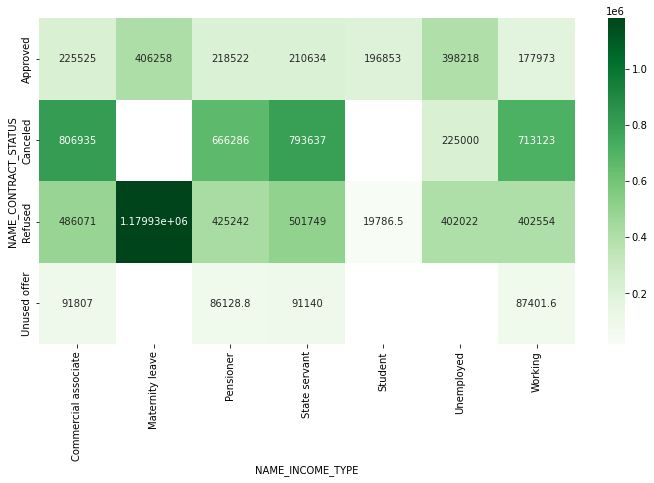

In [260]:
#analysis of NAME_CONTRACT_STATUS and NAME_INCOME_TYPE for AMT_CREDIT

ana_contr_inc=pd.pivot_table(data=finalds,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(ana_contr_inc, annot=True,fmt='g',cmap='Greens')
plt.show()

In [261]:
# Defaulters in approved cases
appr_defaulters=finalds[(finalds['NAME_CONTRACT_STATUS']=="Approved") & (finalds['TARGET']==1)]
appr_defaulters.shape

(64400, 71)

In [265]:
final_analysis_col=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE" ]

for i in final_analysis_col:
    print(appr_defaulters[i].value_counts(normalize=True))
    print('\n')

Low         0.286071
High        0.261304
VeryLow     0.185357
VeryHigh    0.137997
Medium      0.129270
Name: INCOME_GROUP, dtype: float64


(25, 30]    0.156289
(35, 40]    0.155947
(30, 35]    0.154581
(40, 45]    0.132547
(45, 50]    0.102857
(50, 55]    0.091941
(55, 60]    0.075621
(60, 65]    0.060481
(20, 25]    0.060155
(65, 70]    0.009581
Name: AGE_GROUP, dtype: float64


F    0.59222
M    0.40778
Name: CODE_GENDER, dtype: float64


Working                 0.604767
Commercial associate    0.209658
Pensioner               0.133261
State servant           0.051708
Unemployed              0.000466
Maternity leave         0.000140
Name: NAME_INCOME_TYPE, dtype: float64


nan                      0.263696
Laborers                 0.231444
Sales staff              0.123929
Drivers                  0.082422
Core staff               0.066693
Managers                 0.052127
Security staff           0.028556
High skill tech staff    0.028245
Cooking staff            0.025233
Medicin

###### final we see the defaulters that were approved for the loan